In [2]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sw_plotting import change_bar_width
from sw_utilities import tukeyTest

logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.ERROR)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 8}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures


mkdir: ../jupyter_figures: File exists


In [4]:
# Read in data from 3 datasets
parent_folder = '../data/Fig4-polarization-cytoskeletal-drugs/_selected-smFISH-for-polarity-quantification/'
folders = glob.glob( os.path.join(parent_folder, '*-output'+os.path.sep) )

In [12]:
# first dataset: 181022-polarity-smFISH-only-ctrl-bleb-noc-Y27632

folder = folders[0]
files = glob.glob( os.path.join(folder, '*polarization_summary.txt') )
assert len(files) == 1
df = pd.read_csv(files[0])

# get date
folder_basename = folder.split(os.path.sep)[-2]
date = folder_basename.split('-')[0]
df['date'] = [date]*len(df)

# get treatment
treatments = []
for i in df.file_name.tolist():
    treatment = i.split('-')[0]
    if treatment == 'Ctrl' or treatment == 'ctrl':
        treatment = 'Control'
    if treatment == 'Bleb' or treatment == 'bleb':
        treatment = 'Blebbistatin'
    if treatment == 'Noc' or treatment == 'noc':
        treatment = 'Nocodazole'
    treatments.append(treatment)

df['treatment'] = treatments
df1 = df.copy()

In [13]:
df1

,file_name,apical_dot_number,basal_dot_number,apical_area,basal_area,polarization_index,date,treatment
0,Bleb-17h-Col4a1-TMR-Net1-655_2018_10_22__21_17...,314,33,154073,155148,0.81100,181022,Blebbistatin
1,Bleb-17h-Col4a1-TMR-Net1-655_2018_10_22__21_17...,337,85,167934,200189,0.65070,181022,Blebbistatin
2,Ctrl-4h-Col4a1-TMR-Net1-655_2018_10_22__23_02_...,332,60,161094,162363,0.69590,181022,Control
3,Ctrl-4h-Col4a1-TMR-Net1-655_2018_10_22__23_02_...,247,61,158778,160197,0.60670,181022,Control
4,Nocodazole-4h-Col4a1-TMR-Net1-655_2018_10_22__...,212,283,179946,214538,-0.05646,181022,Nocodazole
5,Nocodazole-4h-Col4a1-TMR-Net1-655_2018_10_22__...,216,226,152042,153384,-0.01823,181022,Nocodazole
6,Y27632-17h-Col4a1-TMR-Net1-655_2018_10_22__20_...,145,48,156526,157622,0.50520,181022,Y27632
7,Y27632-17h-Col4a1-TMR-Net1-655_2018_10_22__20_...,179,46,162825,163871,0.59320,181022,Y27632
8,Y27632-17h-Col4a1-TMR-Net1-655_2018_10_22__20_...,108,87,156134,191808,0.20790,181022,Y27632


In [14]:
# second dataset: 181024-polarity-Golgi-ER-costaining-ctrl-bleb-noc-Y27632

folder = folders[1]
files = glob.glob( os.path.join(folder, '*polarization_summary.txt') )
assert len(files) == 1
df = pd.read_csv(files[0])

# get date
folder_basename = folder.split(os.path.sep)[-2]
date = folder_basename.split('-')[0]
df['date'] = [date]*len(df)

# get treatment
treatments = []
for i in df.file_name.tolist():
    treatment = i.split('-')[0]
    if treatment == 'Ctrl' or treatment == 'ctrl':
        treatment = 'Control'
    if treatment == 'Bleb' or treatment == 'bleb':
        treatment = 'Blebbistatin'
    if treatment == 'Noc' or treatment == 'noc':
        treatment = 'Nocodazole'
    treatments.append(treatment)

df['treatment'] = treatments
df2 = df.copy()

In [15]:
df2

,file_name,apical_dot_number,basal_dot_number,apical_area,basal_area,polarization_index,date,treatment
0,Y27632--Bleb-2-Y27632-2-17h-antiRCAS1-488-Col4...,173,64,167593,169534,0.464400,181024,Y27632
1,Y27632--Bleb-2-Y27632-2-17h-antiRCAS1-488-Col4...,203,111,157235,158387,0.296300,181024,Y27632
2,bleb--Bleb-2-Y27632-2-17h-antiRCAS1-488-Col4a1...,276,84,163184,164354,0.535900,181024,Blebbistatin
3,bleb--Bleb-2-Y27632-2-17h-antiRCAS1-488-Col4a1...,159,60,153797,155194,0.455600,181024,Blebbistatin
4,ctrl--Ctrl2-Noc4-4h-antiPDI-488-Col4a1-TMR-Net...,125,35,162976,164040,0.564700,181024,Control
5,ctrl--Ctrl2-Noc4-4h-antiPDI-488-Col4a1-TMR-Net...,338,104,165244,200084,0.594800,181024,Control
6,ctrl--Ctrl2-Noc4-4h-antiRCAS1-488-Col4a1-TMR-N...,171,105,157376,158532,0.242600,181024,Control
7,ctrl--Ctrl2-Noc4-4h-antiRCAS1-488-Col4a1-TMR-N...,45,6,159451,160557,0.766100,181024,Control
8,noc--Ctrl2-Noc4-4h-antiPDI-488-Col4a1-TMR-Net1...,44,70,173329,175007,-0.223500,181024,Nocodazole
9,noc--Ctrl2-Noc4-4h-antiPDI-488-Col4a1-TMR-Net1...,79,50,154296,156086,0.230300,181024,Nocodazole


In [19]:
# third dataset: 181024-polarity-Golgi-ER-costaining-ctrl-bleb-noc-Y27632

folder = folders[2]
files = glob.glob( os.path.join(folder, '*polarization_summary.txt') )
assert len(files) == 1
df = pd.read_csv(files[0])

# get date
dates = []
for i in df.file_name.tolist():
    date0 = i.split('-')[0][2:]
    dates.append(date0)
df['date'] = dates

# get treatment
treatments = []
for i in df.file_name.tolist():
    treatment = i.split('-')[5]
    if treatment == 'Ctrl' or treatment == 'ctrl':
        treatment = 'Control'
    if treatment == 'Bleb' or treatment == 'bleb':
        treatment = 'Blebbistatin'
    if treatment == 'Noc' or treatment == 'noc':
        treatment = 'Nocodazole'
    if treatment == 'colch':
        treatment = 'Colchicine'
    if treatment == 'collagenase':
        treatment = 'Collagenase'
    if treatment == 'cytochalasinD':
        treatment = 'Cytochalasin D'
    if treatment == 'latrunculinA':
        treatment = 'Latrunculin A'
    treatments.append(treatment)

df['treatment'] = treatments
df3 = df.copy()

In [20]:
df3

,file_name,apical_dot_number,basal_dot_number,apical_area,basal_area,polarization_index,date,treatment
0,20201117-smFISH-Col4a1-TMR-1-ctrl-2h-1-z-1-pp-pp,157,41,162372,178096,0.61540,201117,Control
1,20201117-smFISH-Col4a1-TMR-1-ctrl-2h-2-z-1-pp-pp,225,88,149357,164840,0.47670,201117,Control
2,20201117-smFISH-Col4a1-TMR-1-ctrl-2h-3-z-1-pp-pp,296,161,206676,237654,0.35780,201117,Control
3,20201117-smFISH-Col4a1-TMR-1-ctrl-2h-4-z-1-pp-pp,315,127,231389,262740,0.47590,201117,Control
4,20201117-smFISH-Col4a1-TMR-2-noc-2h-1-pp-pp,212,110,147321,148097,0.31910,201117,Nocodazole
5,20201117-smFISH-Col4a1-TMR-2-noc-2h-2-pp-pp,281,214,167222,182957,0.17920,201117,Nocodazole
6,20201117-smFISH-Col4a1-TMR-2-noc-2h-3-pp-pp,763,484,468977,531281,0.28210,201117,Nocodazole
7,20201117-smFISH-Col4a1-TMR-2-noc-2h-4-pp-pp,219,249,204624,221138,-0.02538,201117,Nocodazole
8,20201117-smFISH-Col4a1-TMR-3-colch-2h-1-pp-pp,194,341,149513,165071,-0.22840,201117,Colchicine
9,20201117-smFISH-Col4a1-TMR-3-colch-2h-2-pp-pp,140,313,240399,271425,-0.32890,201117,Colchicine


In [21]:
dfs = [df1, df2, df3]
df = pd.concat(dfs)

In [22]:
df.head()

,file_name,apical_dot_number,basal_dot_number,apical_area,basal_area,polarization_index,date,treatment
0,Bleb-17h-Col4a1-TMR-Net1-655_2018_10_22__21_17...,314,33,154073,155148,0.81100,181022,Blebbistatin
1,Bleb-17h-Col4a1-TMR-Net1-655_2018_10_22__21_17...,337,85,167934,200189,0.65070,181022,Blebbistatin
2,Ctrl-4h-Col4a1-TMR-Net1-655_2018_10_22__23_02_...,332,60,161094,162363,0.69590,181022,Control
3,Ctrl-4h-Col4a1-TMR-Net1-655_2018_10_22__23_02_...,247,61,158778,160197,0.60670,181022,Control
4,Nocodazole-4h-Col4a1-TMR-Net1-655_2018_10_22__...,212,283,179946,214538,-0.05646,181022,Nocodazole


<Axes: xlabel='treatment', ylabel='polarization_index'>

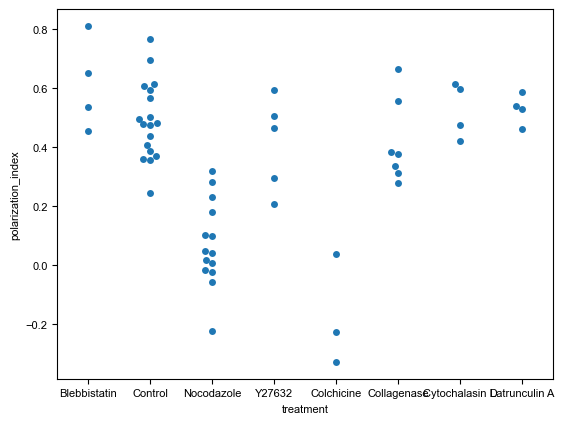

In [23]:
sns.swarmplot(data = df, x='treatment', y='polarization_index')

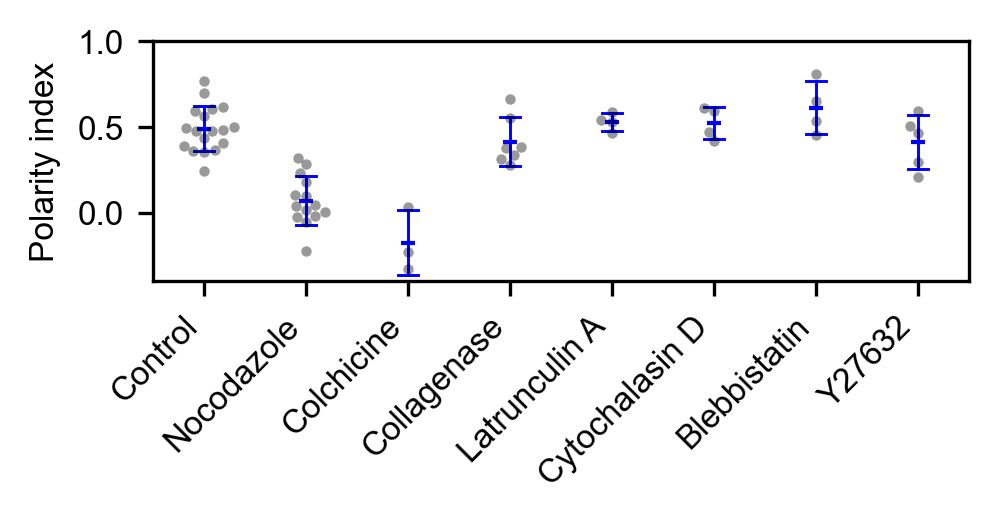

In [27]:
# Swarm plot of 4 categories

outputPrefix = 'Fig4-polarity-index-inhibitors-summary-swarm'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"

fig_width = 3.2
fig_height = 1.0
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.85, 0.8])

plotting_order = ['Control', 'Nocodazole', 'Colchicine', # microtubule drugs
                  'Collagenase', # basement membrane removal
                  'Latrunculin A', 'Cytochalasin D', # actin drugs
                  'Blebbistatin', 'Y27632'] # myosin contractility inhibitors

ax = sns.swarmplot(x='treatment', y='polarization_index', data=df,
                   order=plotting_order,
                   color='k',
                   alpha=.4,
                   size=2.5)

# ax = sns.barplot(x='gene', y='polarization_index', data=df,
#                  color=".7", alpha=1.0,
#                  errwidth=.7, errcolor=".7", capsize=.2, ci='sd')
# # make the bar width narrower
# change_bar_width(ax, .5)

ax = sns.pointplot(x='treatment', y='polarization_index', data=df,
                   ci='sd', capsize=.2, errwidth=.7,
                   order=plotting_order,
                   markers='_', scale=.5, join=False, color="Blue")

plt.ylim(-0.4, 1.0)
# plt.yticks([0, 0.3, 0.6])

plt.xlabel(None)
plt.ylabel("Polarity index")

# rotate x tick labels
x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

# # Remove legend (symbols representing orgnoids)
# ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)


In [28]:
tukeyTest(df.polarization_index, df.treatment)

Summary of test:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
  Blebbistatin     Colchicine  -0.7869    0.0 -1.1192 -0.4547   True
  Blebbistatin    Collagenase   -0.199 0.3105 -0.4717  0.0737  False
  Blebbistatin        Control  -0.1226 0.7418 -0.3631  0.1179  False
  Blebbistatin Cytochalasin D  -0.0872 0.9851 -0.3949  0.2204  False
  Blebbistatin  Latrunculin A   -0.084  0.988 -0.3917  0.2236  False
  Blebbistatin     Nocodazole  -0.5422    0.0 -0.7888 -0.2955   True
  Blebbistatin         Y27632  -0.1999 0.3897 -0.4917  0.0919  False
    Colchicine    Collagenase    0.588    0.0  0.2877  0.8882   True
    Colchicine        Control   0.6644    0.0  0.3931  0.9357   True
    Colchicine Cytochalasin D   0.6997    0.0  0.3674   1.032   True
    Colchicine  Latrunculin A   0.7029    0.0  0.3706  1.0352   True
    Colchicine  